# Decision Tree Model

#### Daniel Fay

#### Train Decision Tree Model - early, on-time, delay, significant delay

In [1]:
# Import Necessary Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn import tree
from sklearn.model_selection import GridSearchCV
% matplotlib inline

In [2]:
# Load Dataset
df = pd.read_csv('data/processed/bus_network_data.csv', index_col=0)
df.head()

,bus_line,direction,date,month,day,day_of_week,time_period,hour,minute,trip_time,...,Humidity,PrecipitationIn,TemperatureF,VisibilityMPH,Wind SpeedMPH,totalInjuries,pavementScore,potholeCount,prev_trip_ratio,ntwk_delay_lag1hr
0,B11,2.0,2016-01-01,1,1,Friday,PeakAM,9,44,38.450000,...,58.0,0.0,39.9,10.0,10.4,162,2110.0,237,0.638492,2.0
1,B11,1.0,2016-01-01,1,1,Friday,PeakAM,9,52,53.900000,...,58.0,0.0,39.9,10.0,10.4,162,2110.0,237,1.055520,2.0
2,B11,2.0,2016-01-01,1,1,Friday,MidDay,10,10,34.700000,...,58.0,0.0,39.9,10.0,6.9,162,2110.0,237,1.017161,4.0
3,B11,1.0,2016-01-01,1,1,Friday,MidDay,10,23,41.050000,...,58.0,0.0,39.9,10.0,6.9,162,2110.0,237,0.979406,4.0
4,B11,2.0,2016-01-01,1,1,Friday,MidDay,10,33,40.183333,...,58.0,0.0,39.9,10.0,6.9,162,2110.0,237,0.591185,4.0


In [3]:
df.columns

Index([u'bus_line', u'direction', u'date', u'month', u'day', u'day_of_week',
       u'time_period', u'hour', u'minute', u'trip_time', u'avg_trip_time',
       u'std_trip_time', u'delay_time', u'delay', u'Conditions', u'Humidity',
       u'PrecipitationIn', u'TemperatureF', u'VisibilityMPH', u'Wind SpeedMPH',
       u'totalInjuries', u'pavementScore', u'potholeCount', u'prev_trip_ratio',
       u'ntwk_delay_lag1hr'],
      dtype='object')

In [4]:
df.ntwk_delay_lag1hr = df.ntwk_delay_lag1hr.astype(str)
df['Wind SpeedMPH'].replace('Calm', 1, inplace=True)
df['Wind SpeedMPH'].replace('-9999', 0, inplace=True)
df['Wind SpeedMPH'] = df['Wind SpeedMPH'].astype(float)
df.dtypes

bus_line              object
direction            float64
date                  object
month                  int64
day                    int64
day_of_week           object
time_period           object
hour                   int64
minute                 int64
trip_time            float64
avg_trip_time        float64
std_trip_time        float64
delay_time           float64
delay                 object
Conditions            object
Humidity             float64
PrecipitationIn      float64
TemperatureF         float64
VisibilityMPH        float64
Wind SpeedMPH        float64
totalInjuries          int64
pavementScore        float64
potholeCount           int64
prev_trip_ratio      float64
ntwk_delay_lag1hr     object
dtype: object

In [5]:
df['delayBinom'] = map(int,((df.delay == 'delay')|(df.delay == 'significant delay')))

In [6]:
# Select target variable and feature space
X = pd.get_dummies(df[[u'bus_line', u'direction', u'month', u'day_of_week',
       u'hour', u'Conditions', u'Humidity', u'PrecipitationIn', 
       u'TemperatureF', u'VisibilityMPH', u'Wind SpeedMPH', u'totalInjuries', 
       u'pavementScore', u'potholeCount', u'prev_trip_ratio', u'ntwk_delay_lag1hr']])

Y = df['delay']

X_train,X_test,y_train,y_test=train_test_split(X, Y, test_size=0.3, random_state=123)

In [7]:
X.columns

Index([u'direction', u'month', u'hour', u'Humidity', u'PrecipitationIn',
       u'TemperatureF', u'VisibilityMPH', u'Wind SpeedMPH', u'totalInjuries',
       u'pavementScore', u'potholeCount', u'prev_trip_ratio', u'bus_line_B11',
       u'bus_line_B15', u'bus_line_B3', u'bus_line_B37', u'bus_line_B38',
       u'bus_line_B4', u'bus_line_B41', u'bus_line_B43', u'bus_line_B54',
       u'bus_line_B57', u'bus_line_B62', u'bus_line_B8', u'day_of_week_Friday',
       u'day_of_week_Monday', u'day_of_week_Saturday', u'day_of_week_Sunday',
       u'day_of_week_Thursday', u'day_of_week_Tuesday',
       u'day_of_week_Wednesday', u'Conditions_Clear', u'Conditions_Haze',
       u'Conditions_Heavy Rain', u'Conditions_Heavy Snow',
       u'Conditions_Light Freezing Rain', u'Conditions_Light Rain',
       u'Conditions_Light Snow', u'Conditions_Mostly Cloudy',
       u'Conditions_Overcast', u'Conditions_Partly Cloudy', u'Conditions_Rain',
       u'Conditions_Scattered Clouds', u'Conditions_Snow',
      

In [8]:
# Find best C parameter
param_grid = {'max_depth': np.linspace(10,18,10)}
dtc = DTC()
C_param = GridSearchCV(dtc, param_grid, cv=5)
C_param.fit(X_train, y_train)
C_param.best_params_

{'max_depth': 13.555555555555555}

In [9]:
# Cross validate using best C parameter
avg_acc = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.33, random_state=i) #Use random_state to fix samples
    #X_train_dummies = pd.get_dummies(X_train)
    #X_test_dummies = pd.get_dummies(X_test)

    clf = DTC(max_depth=C_param.best_params_.values()[0]) 
    clf.fit(X_train, Y_train)

    avg_acc.append(1.0*(clf.predict(X_test)==np.asarray(Y_test)).sum()/len(Y_test))

print ("Successfully (OS) predict {}% of Bus Delays".format(np.mean(avg_acc)*100))

Successfully (OS) predict 47.3507511632% of Bus Delays


In [11]:
y_pred = clf.predict(X_test)

In [12]:
np.unique(y_pred, return_counts=True)

(array(['delay', 'early', 'on-time', 'significant delay'], dtype=object),
 array([ 26635, 111079,  95871,  25613]))

In [13]:
df_dummies = X.copy()
df_dummies['delay'] = Y.copy()
delay_df = df_dummies.loc[df_dummies['delay'].isin(['delay','significant delay'])]

In [14]:
Y_delay = delay_df['delay']
X_delay = delay_df.iloc[:,:-1]

In [15]:
1.0*(clf.predict(X_delay)==np.asarray(Y_delay)).sum()/len(Y_delay)

0.2697064348759542

#### Train Decision Tree Model - delay, no delay

In [16]:
# Select target variable and feature space
X = pd.get_dummies(df[[u'bus_line', u'direction', u'month', u'day_of_week',
       u'hour', u'Conditions', u'Humidity', u'PrecipitationIn', 
       u'TemperatureF', u'VisibilityMPH', u'Wind SpeedMPH', u'totalInjuries', 
       u'pavementScore', u'potholeCount', u'prev_trip_ratio', u'ntwk_delay_lag1hr']])

Y = df['delayBinom']

X_train,X_test,y_train,y_test=train_test_split(X, Y, test_size=0.3, random_state=123)

In [17]:
# Find best C parameter
param_grid = {'max_depth': np.linspace(10,18,10)}
dtc = DTC()
C_param = GridSearchCV(dtc, param_grid, cv=5)
C_param.fit(X_train, y_train)
C_param.best_params_

{'max_depth': 11.777777777777779}

In [18]:
# Cross validate using best C parameter
avg_acc = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.33, random_state=i) #Use random_state to fix samples
    #X_train_dummies = pd.get_dummies(X_train)
    #X_test_dummies = pd.get_dummies(X_test)

    clf = DTC(max_depth=C_param.best_params_.values()[0]) 
    clf.fit(X_train, Y_train)

    avg_acc.append(1.0*(clf.predict(X_test)==np.asarray(Y_test)).sum()/len(Y_test))

print ("Successfully (OS) predict {}% of Bus Delays".format(np.mean(avg_acc)*100))

Successfully (OS) predict 71.9705784767% of Bus Delays


In [20]:
y_pred = clf.predict(X_test)
np.unique(y_pred, return_counts=True)

(array([0, 1]), array([212124,  47074]))

In [21]:
df_dummies = X.copy()
df_dummies['delayBinom'] = Y.copy()
delay_df = df_dummies.loc[df_dummies['delayBinom'] == 1]
Y_delay = delay_df['delayBinom']
X_delay = delay_df.iloc[:,:-1]

In [22]:
1.0*(clf.predict(X_delay)==np.asarray(Y_delay)).sum()/len(Y_delay)

0.3630315183683206

#### Create Decision Tree Visualization

In [23]:
Feature_importance=pd.DataFrame([list(X_train.columns),list(clf.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]
Feature_importance.sort_values(by="importance",ascending=False).iloc[:10,:]

,variables,importance
2,hour,0.661436
9,pavementScore,0.0758304
11,prev_trip_ratio,0.0462882
10,potholeCount,0.0247867
0,direction,0.0200928
27,day_of_week_Sunday,0.0200559
26,day_of_week_Saturday,0.018727
1,month,0.0136018
49,ntwk_delay_lag1hr_4.0,0.0117596
46,ntwk_delay_lag1hr_1.0,0.0110934


In [54]:
# Select target variable and feature space
X_red = pd.get_dummies(df[[u'hour', u'pavementScore', u'prev_trip_ratio', 'potholeCount', 'direction']])

Y = df['delayBinom']

X_train,X_test,y_train,y_test=train_test_split(X_red, Y, test_size=0.3, random_state=123)

In [63]:
# Cross validate using best C parameter
avg_acc = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(
        X_red, Y, test_size=0.33, random_state=i) #Use random_state to fix samples
    X_train_dummies = pd.get_dummies(X_train)
    X_test_dummies = pd.get_dummies(X_test)

    clf = DTC(max_leaf_nodes=4) 
    clf.fit(X_train, Y_train)

    avg_acc.append(1.0*(clf.predict(X_test_dummies)==np.asarray(Y_test)).sum()/len(Y_test))

print ("Successfully (OS) predict {}% of Bus Delays".format(np.mean(avg_acc)*100))

Successfully (OS) predict 70.7144731055% of Bus Delays


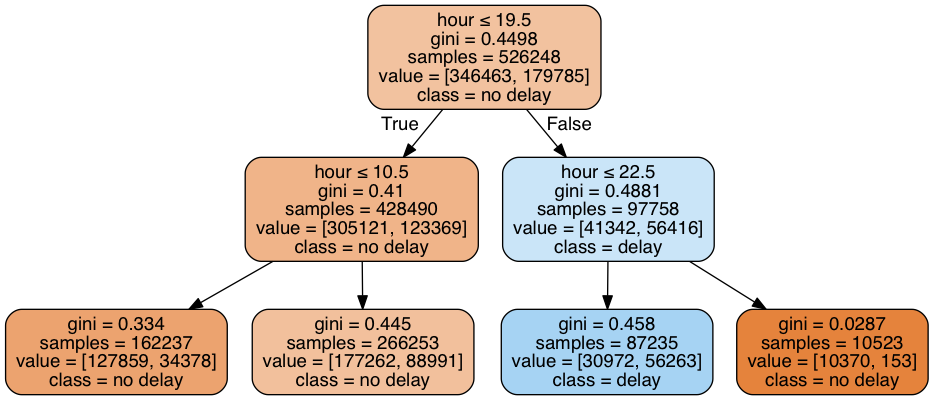

In [64]:
from sklearn.externals.six import StringIO  
from sklearn import tree
from IPython.display import Image  
import pydotplus
dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=["hour", "pavementScore","prev_trip_ratio", 'potholeCount', 'direction'],  
                         class_names=["no delay", "delay"],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

#### Confusion Matrix

In [45]:
# Select target variable and feature space
X = pd.get_dummies(df[[u'bus_line', u'direction', u'month', u'day_of_week',
       u'hour', u'Conditions', u'Humidity', u'PrecipitationIn', 
       u'TemperatureF', u'VisibilityMPH', u'Wind SpeedMPH', u'totalInjuries', 
       u'pavementScore', u'potholeCount', u'prev_trip_ratio', u'ntwk_delay_lag1hr']])

Y = df['delayBinom']

X_train,X_test,y_train,y_test=train_test_split(X, Y, test_size=0.3, random_state=123)

In [47]:
# Cross validate using best C parameter
avg_acc = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.33, random_state=i) #Use random_state to fix samples
    #X_train_dummies = pd.get_dummies(X_train)
    #X_test_dummies = pd.get_dummies(X_test)

    clf = DTC(max_depth=12) 
    clf.fit(X_train, Y_train)

    avg_acc.append(1.0*(clf.predict(X_test)==np.asarray(Y_test)).sum()/len(Y_test))

print ("Successfully (OS) predict {}% of Bus Delays".format(np.mean(avg_acc)*100))

Successfully (OS) predict 71.9260179477% of Bus Delays


In [48]:
y_pred = clf.predict(X_test)

Normalized confusion matrix
[[ 0.9   0.1 ]
 [ 0.62  0.38]]


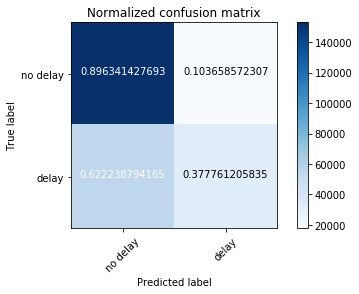

In [53]:
import itertools
from sklearn.metrics import confusion_matrix


class_names = ['no delay', 'delay']
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, y_pred)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()